C:\Users\pawel\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


First few rows of the dataset:
   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Co

C:\Users\pawel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


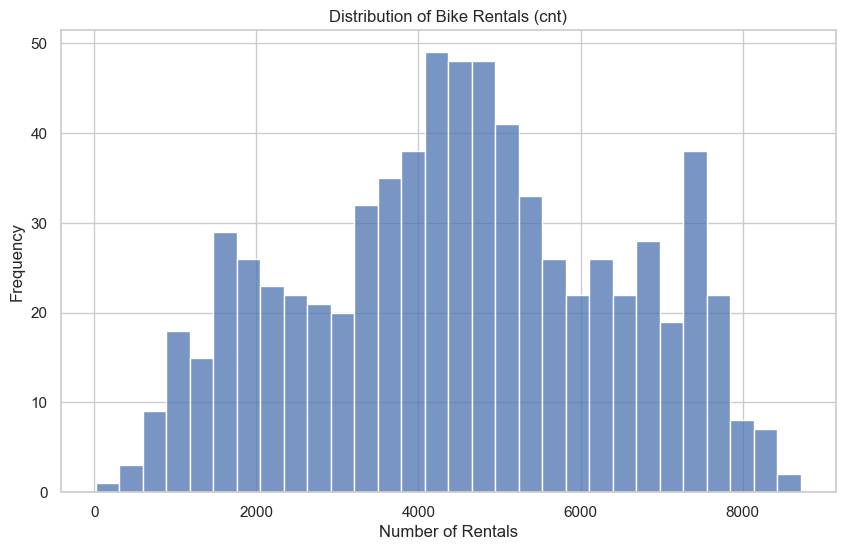

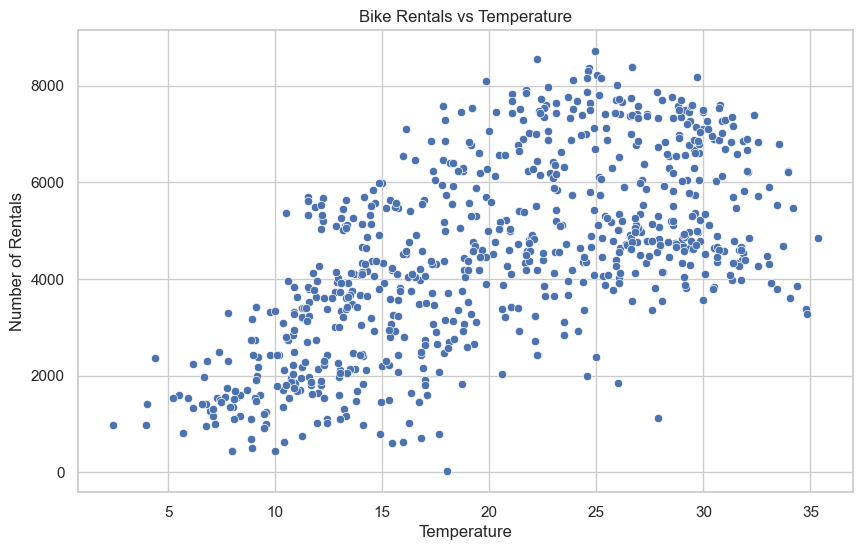

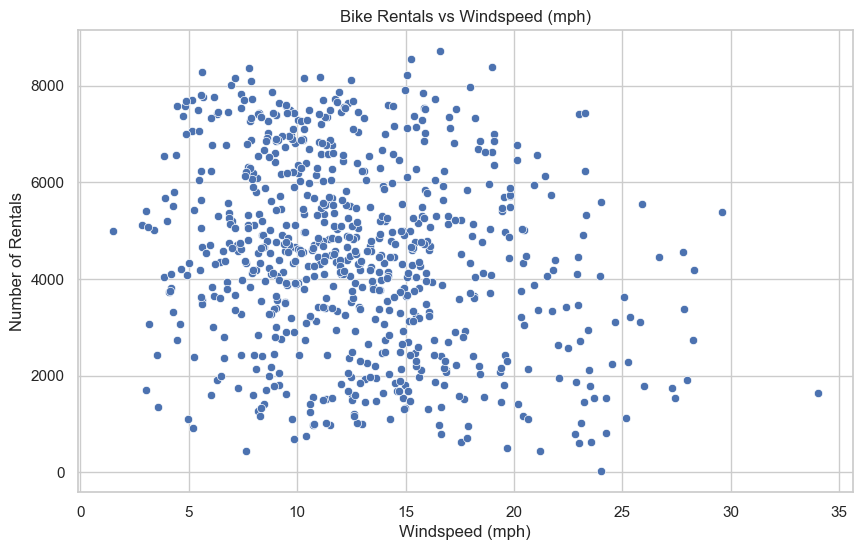

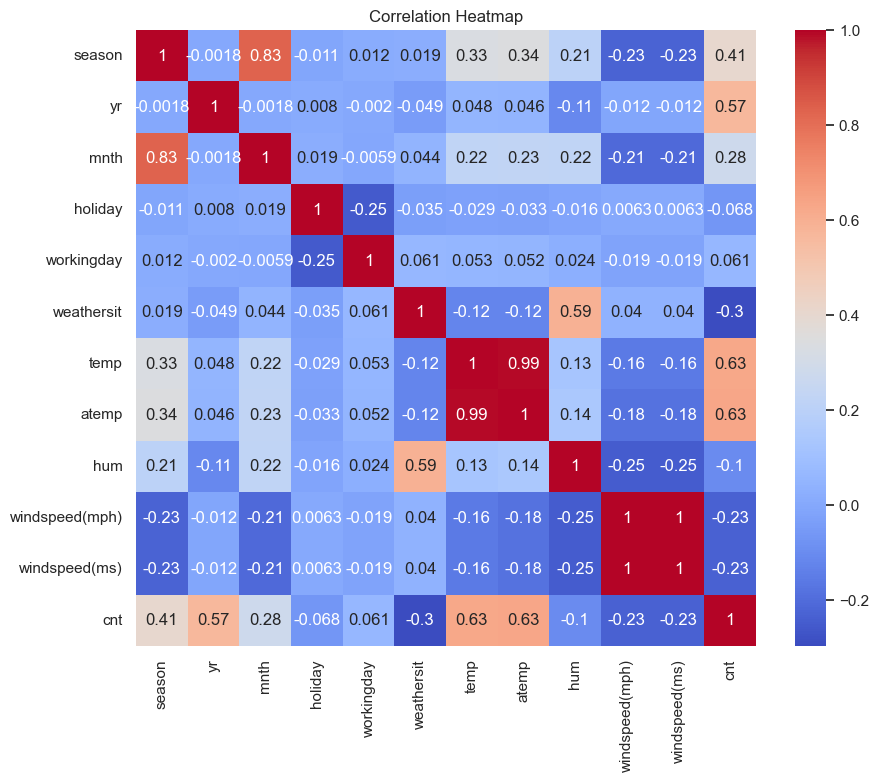

C:\Users\pawel\AppData\Local\Temp\ipykernel_28404\688905584.py:66: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Mean Squared Error: 1855015.7322577173
R-squared Score: 0.5337945344530723


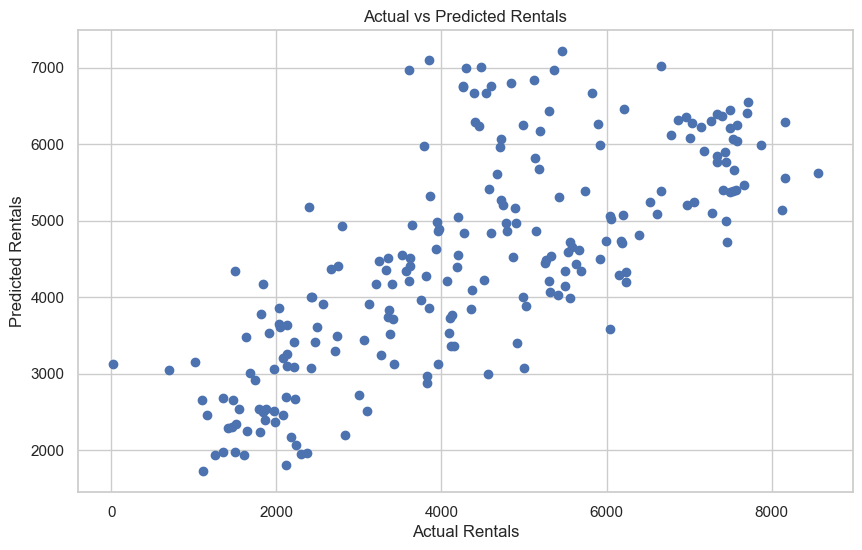

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set the style for plots
sns.set(style="whitegrid")

# Step 1: Load the Dataset
data_path = 'bikes_rent.csv'
df = pd.read_csv(data_path)

# Step 2: Initial Data Inspection
print("First few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values Count:")
print(df.isnull().sum())

# Step 3: Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(df.describe())

# Plotting a histogram of bike rentals (column `cnt`)
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30)
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()

# Scatter plots to understand the relationship between temp, windspeed, and bike rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='cnt')
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Number of Rentals')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='windspeed(mph)', y='cnt')
plt.title('Bike Rentals vs Windspeed (mph)')
plt.xlabel('Windspeed (mph)')
plt.ylabel('Number of Rentals')
plt.show()

# Step 4: Feature Engineering
# Encoding weekday and other categorical variables
df = pd.get_dummies(df, columns=['weekday'], drop_first=True)

# Step 5: Correlation Analysis
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 6: Data Preprocessing
df.fillna(method='ffill', inplace=True)

# Step 7: Modeling
# Defining features (X) and target (y)
X = df[['temp', 'hum', 'windspeed(mph)', 'season', 'holiday', 'workingday', 'weathersit']]  # Adjust feature selection as needed
y = df['cnt'] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared Score: {r2_score(y_test, y_pred)}')

# Step 9: Analysis of Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Rentals')
plt.show()
